In [52]:
import pandas as pd
from utils import clean_str
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.axes._axes import Axes
from matplotlib.figure import Figure
import numpy as np

In [53]:
df = pd.concat([pd.read_csv('./ProcessedData/mr/train_data.csv'), pd.read_csv('./ProcessedData/mr/test_data.csv')], axis = 0, ignore_index=True)

In [54]:
idx2label = {0: "negative", 1 : "positive"}

In [55]:
df['text'] = df['text'].map(clean_str)

In [56]:
labelCounter = {
    0 :{},
    1 :{}
}
word_set = set()
word_count = {}

In [57]:
for _, row in tqdm(df.iterrows()):
    target : int = row['target']
    text : str = row['text']
    for word in text.split():
        word_set.add(word)
        if word not in word_count:
            word_count.update({word:0})
        if word not in labelCounter[target]:
            labelCounter[target].update({word : 0})
        labelCounter[target][word] += 1
        word_count[word] += 1

10662it [00:00, 24478.79it/s]


In [58]:
def getRatio(word:str):
    labels = []
    labelCount = []
    for i in range(len(idx2label)):
        labels.append(idx2label[i])
        labelCount.append(float(labelCounter[i][word]) if word in labelCounter[i] else 0.)
    return labels, labelCount

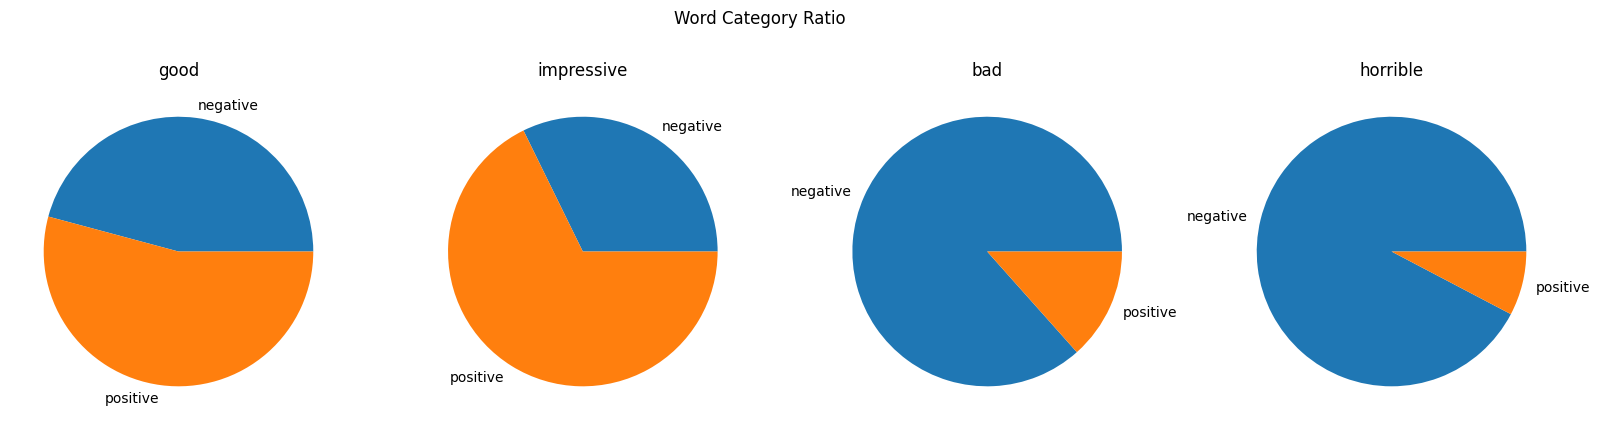

In [59]:
target_words = ['good', 'impressive', 'bad', 'horrible']
results = [getRatio(target_word) for target_word in target_words]
fig, axs = plt.subplots(1, len(results), figsize=(20, 5))
fig : Figure 
axs : np.ndarray[Axes]
for i, ax in enumerate(axs.flat):
    ax : Axes
    ax.set_title(target_words[i])
    ax.pie(results[i][1], labels=results[i][0])
fig.suptitle(t = "Word Category Ratio")
fig.savefig('./result/Word_Category_Ratio.png', transparent=True)
plt.show()